/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


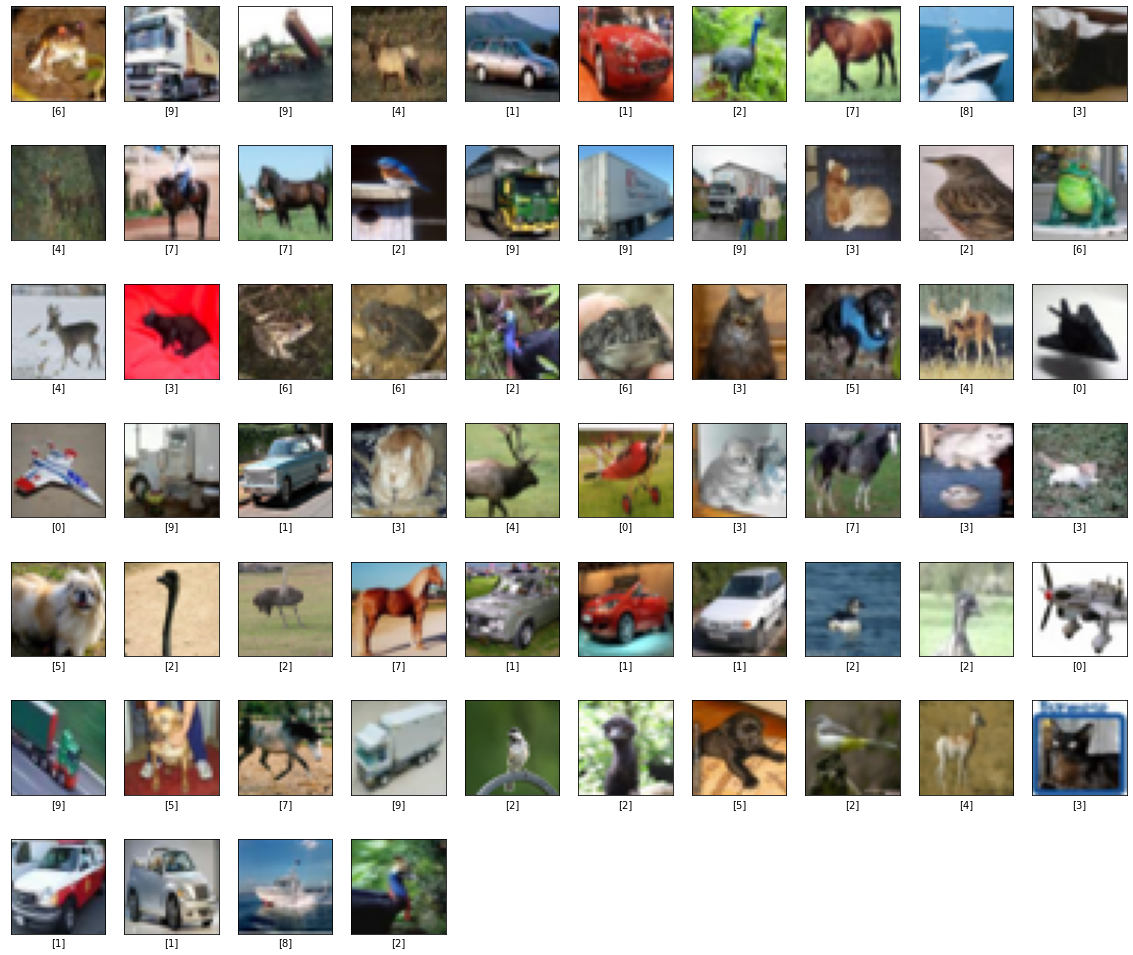

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
for i in range(64):
  plt.subplot(8,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])     
                          #ảnh trắng đen
  plt.xlabel(y_train[i])   #lớp thứ
plt.show()
#hoac  for i in range(100):
 # plt.subplot(10,10,0+i+1)
 # plt.imshow(x_train[i])
               #   plt.imshow(x_train[i], cmap=plt.cm.binary)    # cmap=plt.cm.binar hiển thị hình trang17 đen

 # plt.colorbar()
  # plt.grid(True)
  # plt.show()
print(X_train.shape)
X = X_test
print(X_test.shape)


In [ ]:
X_train =X_train.reshape(50000,3072)
X_test = X_test.reshape(10000,3072)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
model = Sequential()
model.add(Dense(1500,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation="softmax"))
model.summary()
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

# verbose=1 cho thấy tiến trình, còn 0 thì không thấy
#Batch size: số lượng dữ liệu Mini-Batch Gradient Descent sử dụng trong 1 lần để cập nhật tham số
history=model.fit(X_train, y_train, batch_size=128,epochs =50, verbose=1,validation_data=(X_test,y_test)) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              4609500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               768512    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 5,383,142
Trainable params: 5,383,142
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
391/391 [==========================

In [ ]:
# liên kết driver
from google.colab import drive
drive.mount('/content/drive')
# save model
model.save('/content/drive/MyDrive/Colab Notebooks/model_ANN_cifar10.h5')
#model.save_weights('/content/drive/MyDrive/Colab Notebooks/model_CNN_weights_mnist.h5')

from keras.models import load_model
model=load_model('/content/drive/MyDrive/Colab Notebooks/model_ANN_cifar10.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


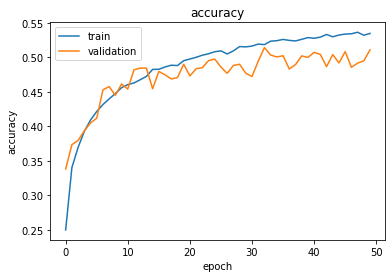

In [ ]:
# biểu đồ biểu thị độ chính xác
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
# độ chính xác
test_loss,test_acc=model.evaluate(X_test,y_test,verbose=0)
print(f'test_acc: {test_acc*100}') 

test_acc: 51.0699987411499


In [ ]:
names= [ 'airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

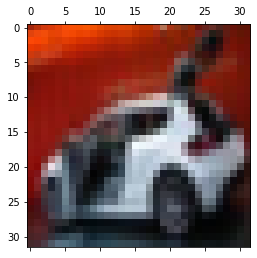

In [ ]:
plt.matshow(X[6])

In [ ]:
import numpy as np
y_predicted = model.predict(X_test)
print(names[np.argmax(y_predicted[6])])

automobile


# test model ngoài

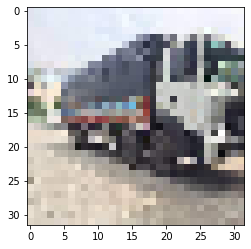

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img=load_img('xe_tai.jpeg',target_size=(32,32,3))
plt.imshow(img)

In [ ]:
img=img_to_array(img)  # tạo mảng
#img = img[:,:,0]  #hinh test là 3 màu RGB, nhưng tâp train là 1 màu xám
img=img.reshape(1, 3072,)
img=img.astype('float32')
img=img/255
import numpy as np
print(names[np.argmax(model.predict(img))])

truck
